In [70]:
from ekonlpy.tag import Mecab
import pandas as pd
import glob
from tqdm import tqdm
from ekonlpy.sentiment import MPCK

In [73]:
mecab = Mecab()
mpck = MPCK()

In [60]:
# file_list = glob.glob('csvfile/*.csv')

In [61]:
# 3사의 뉴스를 다합치는 코드입니다

# with open('ALL_NEWS.csv', 'w', encoding='utf=8') as f:#인포맥스, 이데일리, 연합뉴스 다합치기
#     cn=0
#     for file in file_list:
#         cn+=1
        
#         df = pd.read_csv(file)
#         if cn==1:#첫번째에만 header를 넣었다
#             df.to_csv(f,index=False, header=True, encoding='utf-8')
#         else : 
#             df.to_csv(f,index=False, header=False, encoding='utf-8')
    

In [62]:
news_file = pd.read_csv('ALL_NEWS.csv', parse_dates=['time'])
news_file = news_file.drop_duplicates(['body'])#중복값 삭제
news_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220125 entries, 0 to 224867
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   media   220125 non-null  object        
 1   time    220125 non-null  datetime64[ns]
 2   body    220125 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 6.7+ MB


In [74]:
from nltk import sent_tokenize

sent_token = sent_tokenize(news_file['body'][0])
ls=[]
for sent in sent_token:
    print(sent)
    ls.append(mpck.ngramize(mpck.tokenize(sent)))
    
ls

1일 국채선물시장은 뚜렷한 방향성 없이 출발할 것으로 전망됐다 국채선물은 장중 코스피 움직임 등에 소폭 연동할 것으로 예상됐다  지난밤 미국 국채금리는 주간 실업보험 청구자 수가 예상보다 많게 나오자 하락했으나 1월 비농업부문 고용 결과 발표를 하루 앞두고 있어 낙폭이 제한됐다 10년만기 국채금리는 전일보다 1bp 하락한 연 1983를 나타냈다  삼성선물 1060510620 우리선물 1060710619 삼성선물 금리인하 기대 약화와 함께 수익률 곡선 스티프닝이 심화되면서 장단기 금리 스프레드는 지난 1228일 수준34bp까지 확대됨 이는 국고3년 금리가 지난 화요일 급등에 대한 부담으로 상승폭을 일부 반납하였으나 안전자산 선호 약화 흐름 속 커브 스티프닝Bearish Steepening이 재개된 것으로 판단됨 특히 지난 11월의 경우 국고3년 금리가 장단기 스프레드 확대 흐름을 선행하였으나 현재는 장단기 스프레드 확대가 금리 상승을 선행하는 등 시장 정서가 듀레이션 축소에 초점이 마춰지고 있는 것으로 판단됨 밤사이 주간 고용지표 부진과 개인 소비가 예상치를 하회하면서 미 10년 국채금리는 전일과 동일한 199로 마감함 안전자산 선호가 다시 강화되고 있다고 평가하기는 어려우나 최근의 증시 반등 피로감에 따른 소폭의 되돌림 현상이 전반적으로 전개되는 가운데 금일 국채선물 시장은 코스피지수 등락과 연동된 보합 흐름을 전망 우리선물 한국 경상수지가 예상외 호조세를 나타내면서 국채선물은 전일대비 8틱 하락한 10619에서 출발 이후 10621까지 상승폭을 확대하기도 했으나 외국인의 강한 매도압력 속에서 눌림이 계속되다가 최 차관보가 선물환 포지션 한도를 추가적으로 조정할 수 있다는 발언에 6틱 이상 급락 결국 전일대비 14틱 하락한 10614로 마감 10년물은 전일대비 55틱 하락한 11603으로 하락함 금리인하 기대감이 약화된 것은 인정해야 할 듯 하지만 한국의 12월 경상수지와 미국 4분기 GDP가 동시에 하락세를 기록했다는 것은 유념해야 할 것 스페인의 4분기 G

[['금리/NNG;인하/NNG;기대/NNG;약화/NNG',
  '금리/NNG;인하/NNG;기대/NNG;약하/VA',
  '금리/NNG;장단기스프레드/NNG;확대/NNG',
  '안전자산/NNG;선호/NNG;약화/NNG',
  '국고채/NNG;금리/NNG;급등/NNG',
  'gdp/NNG;예상/NNG;부진/NNG',
  '국채/NNG;금리/NNG;하락/NNG',
  '금리/NNG;급등/NNG;부담/NNG',
  '고용/NNG;지표/NNG;부진/NNG',
  '소비/NNG;예상/NNG;하회/NNG',
  '하락/NNG;소폭/MAG;되돌/VV',
  '일드커브/NNG;스티프닝/NNG',
  '듀레이션/NNG;축소/NNG',
  '국채선물/NNG;하락/NNG',
  '예상밖/NNG;호조/NNG',
  'gdp/NNG;하락/NNG',
  '금리/NNG;상승/NNG',
  '금리갭/NNG;낮/VA',
  '예상/NNG;많/VA']]

In [58]:
news_file = news_file.sort_values('time') #시간순정렬
news_file.reset_index(inplace = True) #인덱스리셋
news_file = news_file[['media','time','body']] #필요한열만 불러오기
news_file['ngramize']=0 #token화하기위환 새로운열 생성

In [59]:
news_file.head(10)

,media,time,body,ngramize
0,이데일리,2005-05-01,뉴욕증시 투자자들이 시장의 방향을 정하지 못한채 하루하루 재료에 과민반응하고 있다...,0
1,이데일리,2005-05-01,"4월은 잔인했다. 어닝 시즌, 기업들이 내놓은 실적은 실망감만 불렀고 세자리수대를...",0
2,이데일리,2005-05-01,지난주(4월25~29일) 940선대에서 출발한 증시가 910선대에서 마감했다. `...,0
3,이데일리,2005-05-01,은행들이 수수료 수입에 급급한 나머지 `일단 팔고 보자`는 식의 상품판매 경쟁에 ...,0
4,연합뉴스,2005-05-01,이른바 은행들의 전쟁 원년인 올해 4대 시중은행의 초반 전적표가 나왔다.1일 금융계...,0
5,연합뉴스,2005-05-01,3월 중소기업 대출 연체율이 작년 동기에비해서는 낮아졌지만 작년 말에 비해서는 높아...,0
6,이데일리,2005-05-02,"국제 유가가 고공행진을 지속하고 달러화 자산에 대한 우려가 커지면서, 이슬람 채권...",0
7,이데일리,2005-05-02,현대선물은 2일 이달 달러/원 환율은 월중 고점이 낮아지는 점진적 하락세를 지속할...,0
8,이데일리,2005-05-02,한덕수 경제부총리 겸 재정경제부 장관은 3일 간부회의에서 서울 등 수도권 지역에서...,0
9,이데일리,2005-05-02,채권금리가 2일 관망세를 보이며 보합 수준에 머물고 있다. 단 5년물과 10년물 ...,0


In [53]:
news_file['tokenize'][:10]

0      [긍정, 부정, 엇비슷, 장기, 평균치, 비관, 분기, 이익, 성장률, 예상치, 없]
1    [실제, 유가증권시장, 경우, 집중, 외국인, 매도, 전기전자, 운수, 장비, 철강...
2    [주식자금, 증가세, 유지, 연초, 이후, 감소세, 지속, 채권형, 자금, 시중, ...
3    [또, 은행장, 비롯, 주요, 간부, 직원, 재임, 기간, 단기, 업적주의, 장기,...
4                        [연체율, 작년, 말, 포인트, 높, 포인트, 기록]
5    [시중은행, 관계자, 은행, 몸집, 자산, 건전, 운용, 추세, 중소기업, 대출심사...
6    [내수, 회복, 기대감, 가운데, 환율, 유가, 미국, 금리, 인상, 상대적, 방어...
7                              [최소가입금액, 가입, 좌수, 제한, 없]
8           [결국, FOMC, 전후, 기술적, 반등, 기대, 폭, 제한적, 일, 생각]
9    [분명, 역발상, 차별화, 고객, 재발견, 기존, 경쟁, 틀, 고객, 조직, 가치,...
Name: tokenize, dtype: object

In [10]:
news_file.to_csv('Tokenized_News.csv')

In [22]:
from ekonlpy.sentiment import MPCK
mpck = MPCK()

# ngrams = mpck.ngramize(tokens)
# score = mpck.classify(tokens + ngrams, intensity_cutoff=1.5)

In [13]:
news_file['body'][0][:200]

' 뉴욕증시 투자자들이 시장의 방향을 정하지 못한채 하루하루 재료에 과민반응하고 있다. 급등과 급락을 반복하는 톱날식 횡보장이 2주째 이어지고 있다. , 월가 전문가들은 이런 장세가 이번주에 절정을 이룰 것으로 내다보고 있다. 과민증세의 배경이 돼 온 연방준비제도이사회(FRB)의 공개시장위원회(FOMC)와, 경기 소강국면(soft patch)의 최신 동향을 '

In [51]:
sent0 = sent_tokenize(news_file['body'][0])[0]
mpck.ngramize(mpck.tokenize(sent0))

[]

In [44]:
ngrams = mpck.ngramize(mpck.tokenize(news_file['body'][0]), keep_overlapping_ngram=True)
ngrams

['금리/NNG;인상/NNG',
 '금리/NNG;인상/NNG',
 '금리/NNG;인상/NNG',
 '금리/NNG;인상/NNG;긴축/NNG',
 '인상/NNG;긴축/NNG',
 '물가/NNG;오르/VV',
 '경기/NNG;둔화/NNG',
 '인플레이션/NNG;압력/NNG',
 '인플레이션/NNG;압력/NNG;억제/NNG',
 '지표/NNG;예상/NNG;나쁘/VA',
 '예상/NNG;나쁘/VA',
 '실적/NNG;양호/NNG',
 '전망/NNG;실망/NNG',
 '전망/NNG;좋/VA',
 '전망/NNG;좋/VA;않/VX',
 '긍정/NNG;부정/NNG']

In [45]:
ngrams = mpck.ngramize(mpck.tokenize(news_file['body'][0]), keep_overlapping_ngram=False)
ngrams

['인플레이션/NNG;압력/NNG;억제/NNG',
 '금리/NNG;인상/NNG;긴축/NNG',
 '지표/NNG;예상/NNG;나쁘/VA',
 '전망/NNG;좋/VA;않/VX',
 '경기/NNG;둔화/NNG',
 '실적/NNG;양호/NNG',
 '전망/NNG;실망/NNG',
 '긍정/NNG;부정/NNG',
 '물가/NNG;오르/VV']

In [61]:
for i in tqdm(range(len(news_file['body']))):
    news_file['ngramize'][i] = mpck.ngramize(mpck.tokenize(news_file['body'][i]))    

100%|████████████████████████████████████████████████████████████████████████| 220125/220125 [1:25:46<00:00, 42.77it/s]


In [62]:
import pickle
news_file = news_file[['time','ngramize']]
news_set = news_file.groupby('time').sum()
news_set.to_pickle("news_set.pkl")
news_set.head()
# df = pd.read_pickle("df.pkl")
#뉴스기사 ngramize한 세트들 저장

In [63]:
bond = pd.read_pickle('채권토큰.pickle')
bond.rename(columns={'날짜':'time'}, inplace=True)
bond['ngramize'][0]
bond['time'] = pd.to_datetime(bond['time'])
# bond.set_index('time', inplace=True)
bond.head()

In [23]:
mpb = pd.read_csv('MPB.csv', header=None, names=['body','none'], index_col=0)
# bond = pd.read_csv('날짜별 채권정보.csv')
mpb = pd.read_csv('MPB.csv',parse_dates=['Unnamed: 0'])
mpb = mpb.rename(columns = {'Unnamed: 0':'time'})
mpb = mpb.set_index('time')
mpb.head()
mpb['ngramize'] = [mpck.ngramize(mpck.tokenize(i)) for i in mpb['body']]
mpb = mpb[['ngramize']]


In [ ]:
resul = pd.concat([news_set, mpb]) ##### mpb합치기
resul.info()
result = pd.concat([resul, bond])  ######## bond합치기
result.head()

result.reset_index(inplace=True)
result_set = result.groupby('time').sum()

result_set.to_pickle('result_set.pkl')

# result_set이 call금리랑 ngramize까지 합쳐서 완료된거

In [259]:
result_set.head()

,ngramize,up_down
time,,
2005-05-01,"[인플레이션/NNG;압력/NNG;억제/NNG, 금리/NNG;인상/NNG;긴축/NNG...",상승
2005-05-02,"[국제/NNG;유가/NNG;고공행진/NNG, 국제/NNG;유가/NNG;강세/NNG,...",상승
2005-05-03,"[fed/NNG;ff/NNG;금리/NNG;인상/NNG, 저점/NNG;경계/NNG, ...",상승
2005-05-04,"[금리/NNG;인상/NNG;가능성/NNG;줄/VV, 채권/NNG;금리/NNG;소폭/...",하락
2005-05-05,"[대출/NNG;한도/NNG;최대/NNG, 경기/NNG;둔화/NNG;우려/NNG;금리...",하락


In [ ]:
result_set = pd.read_pickle('result_set.pkl')

In [7]:
callrate = pd.read_csv('callrate_month_upanddown.csv')

callrate = callrate[30:4658][['date','up_down']]
callrate = callrate.rename(columns={'date':'time'})
callrate = callrate.set_index('time')
result_set = result_set.merge(callrate, left_index=True, right_index=True)
result_set.head()



,ngramize,up_down
time,,
2005-05-01,"[인플레이션/NNG;압력/NNG;억제/NNG, 금리/NNG;인상/NNG;긴축/NNG...",상승
2005-05-02,"[국제/NNG;유가/NNG;고공행진/NNG, 국제/NNG;유가/NNG;강세/NNG,...",상승
2005-05-03,"[fed/NNG;ff/NNG;금리/NNG;인상/NNG, 저점/NNG;경계/NNG, ...",상승
2005-05-04,"[금리/NNG;인상/NNG;가능성/NNG;줄/VV, 채권/NNG;금리/NNG;소폭/...",하락
2005-05-05,"[대출/NNG;한도/NNG;최대/NNG, 경기/NNG;둔화/NNG;우려/NNG;금리...",하락


In [9]:
result_set.to_pickle('result_set.pkl')

## 토큰수 세기

In [10]:
from collections import defaultdict

# 범주에 속하는 토큰수 세기 1(스팸), 0(정상))
haw_cnt = 0
dov_cnt = 0

# 토큰별로 문서내 빈도수 카운팅
wordfreq = defaultdict(lambda : [0, 0])

#label 0 이 hawkish   1은 dovish라 가정
for ngrams, label in zip(result_set['ngramize'], result_set['up_down']) :
    
    for ngram in ngrams:
        if label == '상승':
            wordfreq[ngram][0] += 1
        elif label == '하락':
            wordfreq[ngram][1] += 1

for key, (cnt0, cnt1) in wordfreq.items():
    haw_cnt += cnt0
    dov_cnt += cnt1

print('haw_cnt : {}'.format(haw_cnt))
print('dov_cnt : {}'.format(dov_cnt))

haw_cnt : 662080
dov_cnt : 750384


In [11]:
wordfreq2 = wordfreq.copy()

# del cur['key']

for key, value in wordfreq2.items():
    if sum(value)<15:
        del wordfreq[key]

In [12]:
len(wordfreq)

16534

In [13]:
haw_cnt = 0
dov_cnt = 0
for val in wordfreq.values():
    haw_cnt+=val[0]
    dov_cnt+=val[1]
    
print(haw_cnt, dov_cnt)

544975 620442


In [14]:

k=0.5
for key, val in wordfreq.items():
    val.append((k+val[0])/(2*k+haw_cnt))
    val.append((k+val[1])/(2*k+dov_cnt))
    val.append(val[2]/val[3])

In [15]:
wordfreq

defaultdict(<function __main__.<lambda>()>,
            {'인플레이션/NNG;압력/NNG;억제/NNG': [33,
              29,
              6.14705968703209e-05,
              4.7546672297052266e-05,
              1.2928475096275427],
             '금리/NNG;인상/NNG;긴축/NNG': [83,
              39,
              0.00015321775637826252,
              6.366418832995134e-05,
              2.4066553017872994],
             '전망/NNG;좋/VA;않/VX': [59,
              54,
              0.00010917911981445055,
              8.784046237929995e-05,
              1.2429251492667366],
             '경기/NNG;둔화/NNG': [1318,
              1418,
              0.002419372596224421,
              0.0022862696492667338,
              1.0582183938803442],
             '실적/NNG;양호/NNG': [100,
              85,
              0.00018441179061096268,
              0.00013780476208128707,
              1.3382105801407898],
             '전망/NNG;실망/NNG': [7,
              17,
              1.3762073926191245e-05,
              2.820565305757

In [16]:
wordfreq_origin = wordfreq.copy()
for key, val in wordfreq.items():
    if val[4]>1:
        wordfreq[key]=1
    else :
        wordfreq[key]=-1

In [17]:
wordfreq['인플레이션/NNG;압력/NNG;억제/NNG']

1

In [24]:
mpb.sort_index(inplace=True)

In [26]:
import numpy as np
mpb['tone']=0
polar=[]
for i, ngrams in enumerate(mpb['ngramize']):
    plus=0
    minus=0
    for ngram in ngrams:
        if ngram in wordfreq:
            minus+=wordfreq[ngram]

            plus += np.abs(wordfreq[ngram])
            
        
    if plus!=0:
         polar.append(minus/plus)
        
    else:
         polar.append(0)

In [27]:
mpb['tone'] = polar

In [28]:
print(1)

1


In [29]:
mpb.to_pickle('mpb_tone_v1')

In [53]:
rate = pd.read_csv('기준금리.csv', parse_dates=['time'], index_col=['time'])
rate.info()
rate = rate[4:-11] #05~17년도

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2020-03-17 to 1999-05-06
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   base_rate  44 non-null     float64
dtypes: float64(1)
memory usage: 704.0 bytes


In [58]:
rate.to_pickle('기준금리.pickle')

C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py

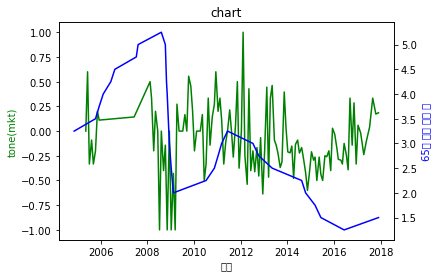

In [59]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()  #보조축 차트 만들기

ax1.set_xlabel('년도')

ax1.set_ylabel('tone(mkt)', color='g')  #라인차트 컬러 지정

ax1.plot(mpb['tone'], 'g-')  #라인차트 형태 지정

ax2 = ax1.twinx()  #보조축을 위한 X축 공유 지정

ax2.plot(rate['base_rate'], 'b-')

ax2.set_ylabel('65세 이상 인구 수', color='b')

plt.title('chart')

# plt.grid()

# fig.tight_layout()

plt.show()